In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
""" 
The equation is:
 y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

EAMPLE: Predicting house prices
    Price = β₀ + β₁(Size) + β₂(Bedrooms) + β₃(Age) + ε

MATRIX FORM

We can write multiple regression in matrix form:
    Y = Xβ + ε

Where:
- Y is an (n×1) vector of outcomes
- X is an (n×p) matrix of predictors (includes column of 1s for intercept)
- β is a (p×1) vector of coefficients
- ε is an (n×1) vector of errors

NORMAL EQUATION (Least Squares Solution)

To find the best β that minimizes the sum of squared errors, we use:

    β = (XᵀX)⁻¹Xᵀy

DERIVATION:
1. We want to minimize: RSS = ||Y - Xβ||²
2. RSS = (Y - Xβ)ᵀ(Y - Xβ)
3. Expand: RSS = YᵀY - 2βᵀXᵀY + βᵀXᵀXβ
4. Take derivative with respect to β: ∂RSS/∂β = -2XᵀY + 2XᵀXβ
5. Set to zero: -2XᵀY + 2XᵀXβ = 0
6. Solve for β: XᵀXβ = XᵀY
7. Final solution: β = (XᵀX)⁻¹XᵀY

"""

In [3]:
# Creating dummy data 

# Set random seed for reproducibility 
np.random.seed(42)
# Genarate dummy data 
n_sample = 200

# Feature 1: House size (1000- 3000 sqft)
# Every value in that range has equal probability (that's what "uniform" means)
size = np.random.uniform(1000, 3000, n_sample)

# Feature 2: Number of bedrooms (2- 5)
bedrooms = np.random.randint(2, 6, n_sample)

# Feature 3: House age (0 - 30 years)
age = np.random.uniform(0, 30, n_sample)

# True relationship (what we are trying to discover)
# Price = 50000 + 150 * size  + 20000 * bedrooms - 2000 * age + noise

true_intercept = 50000
true_coef_size = 150
true_coef_bedrooms = 20000
true_coef_age = -2000

# Generate target variable with some noise 
# Use when values cluster around a mean:(random.normal)
noise = np.random.normal(0, 30, n_sample)
price = (true_intercept +
         true_coef_size * size +
         true_coef_bedrooms * bedrooms +
         true_coef_age * age 
         + noise
        )

In [5]:
print(f"Generated {n_sample} samples\n")
print(f"True coefficients")
print(f"  Intercept: ${true_intercept:,.2f}")
print(f"  Size coefficient: ${true_coef_size:,.2f}")
print(f"  Bedrooms coefficient: ${true_coef_bedrooms:,.2f}")
print(f"  Age coefficient: ${true_coef_age:,.2f}\n")

df = pd.DataFrame({
    "Size": size,
    "Bedrooms": bedrooms,
    "Age": age,
    "Price": price
})
df.head()

Generated 200 samples

True coefficients
  Intercept: $50,000.00
  Size coefficient: $150.00
  Bedrooms coefficient: $20,000.00
  Age coefficient: $-2,000.00



,Size,Bedrooms,Age,Price
0,1749.080238,5,1.550452,409271.385063
1,2901.428613,5,15.940639,553389.299154
2,2463.987884,4,16.219054,467188.587962
3,2197.316968,2,19.122897,381334.444060
4,1312.037281,5,21.782740,303213.159669


In [ ]:
# def fit()

""" 
fit the model using the Normal Equation

Parameters:
X : array - like shape(n_samples, n_feature)
    Training data
y : array - lije shape(n_samples,)
    Target values

normalize : bool 
    Whether to normalize features (recommended)

In [ ]:
""" Normalization:
- Normalization or standardization means scalling features to a similar range, 
typically 

X_normalized = (X - mean) /std  --> mean = 0, sd = 1

Min-Max Scalling:
X_normalized = (X - min)/(max - min) --> values between 0 and 1 


Why do we need it ?
1. Gradient Descent converges faster 
  - When features have different scales, the loss function becomes, elongated/elliptical
   eg: Small in β₂ (size) → huge change in loss (# Feature 1: House size (1000- 3000 sqft))
       Large change in β₁ (bedrooms) → tiny change in loss (Feature 2: Number of bedrooms (2- 5))
       Gradient descent zigzags, takes forever

       And loss function becomes circular, 

       Benefits of standardization:
       - Steps are more direct toward minimum 
       - Converges much faster 
       - More stable training 
-----------------------------------------------------------------------------------
2. Prevent feature Dominance
eg: without normalization 

#Features 
size = 2000  #large numbers
bedrooms = 3  #small numbers

#Initial random weights
 β₁  = 0.001 #for size
 β₂  = 0.001 #for bedrooms

 # Contribution to prediction 
 contribution_size = 0.001 * 2000 = 2.0
 contribution_bedrooms = 0.001 * 3 = 0.001

 Problem : size dominates the prediction! the model can't properly learn the importance 
 of bedrooms because the numbers are so different 


 eg: with normalization 
 # Normalized features (mean = 0, sd = 1)
 size_norm = 0.1
 bedrooms_norm = 0.3

 # Same weights 
  β₁  = 0.001 #for size
  β₂  = 0.001 #for bedrooms

 # Contribution to prediction 
 contribution_size = 0.001 * 0.5 = 0.0005
 contribution_bedrooms = 0.001 * 0.3 = 0.002

 --> Now they are comparable! The model can learn proper weights.

----------------------------------------------------------------------------------
3. Regularization works fairly 

with L2 regularization (Ridge Regression) -) regularization penalty is fairly acorss features

----------------------------------------------------------------------------------

4. Interpretability of Coefficients

after normalization :
β₁ = 0.8  # for size
β₂ = 0.6  # for bedrooms

Interpretation:  A1 standard deviation increase in size has a bigger effect(0.8) than 
A1 standard deviation increase in bedrooms (0.6)

In [ ]:
# def predict()

"""
Make predictions

Parameters:
X : array-like, shape (n_samples, n_features)
            Samples to predict

Returns:
predictions : array, shape (n_samples,)

"""

In [ ]:
# def score()

"""

Calculate R² score (coefficient of determination)

 R² = 1 - (SS_res / SS_tot)
 where :
  SS_res = Σ(y - ŷ)² (residual sum of squares)
  SS_tot = Σ(y - ȳ)² (total sum of squares)

  R² ranges from 0 to 1, where:
        - 1 = perfect predictions
        - 0 = model no better than predicting the mean
"""

In [13]:
class MultipleRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None
        self.X_mean = None
        self.X_std = None

    def fit(self, X, y, normalize = True):
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        # Store original dimensions 
        n_samples, n_features = X.shape

        # Optional : normalize features for better numerical stability 
        if normalize:
            self.X_mean = np.mean(X, axis = 0)
            self.X_std = np.std(X, axis = 0)
            X = (X - self.X_mean)/ self.X_std

        # Add intercept column (column of ones)
        X_with_intercept = np.c_[np.ones(n_samples), X]

        # Apply Normal Equation: β = (XᵀX)⁻¹Xᵀy
        XtX = X_with_intercept.T @ X_with_intercept
        Xty = X_with_intercept.T @ y

        # Solve for coefficients
        beta = np.linalg.solve(XtX, Xty)

        # Seperate intercept and coefficients 
        self.intercept = beta[0, 0]
        self.coefficients = beta[1:].flatten()

        return self

    def predict(self, X):
        X = np.array(X)

        # Normalize if it was done during training 
        if self.X_mean is not None:
            X  = (X - self.X_mean) / self.X_std

        # Make predictions 
        predictions = self.intercept + X @ self.coefficients
        return predictions 

    def score(self, X, y):
        y = np.array(y)
        y_pred = self.predict(X)

        # Calculate R²
        ss_res = np.sum((y - y_pred)** 2)
        ss_tot = np.sum((y - np.mean(y)) **2)
        r2 = 1 - (ss_res/ ss_tot)
        return r2


# Prepare the data 
# np.column_stack takes multiple 1D arrays and stacks them as columns into a 2D array
X_train = np.column_stack([size, bedrooms, age])
y_train = price
print(f"Training the model from scratch")
model_scratch = MultipleRegression()
model_scratch.fit(X_train, y_train, normalize = True)

print(f"Learned coefficients (from scratch)")
print(f"  Intercept: ${model_scratch.intercept:,.2f}")

print(f"  Size coefficient: ${model_scratch.coefficients[0]:,.2f}")
print(f"  Bedrooms coefficient: ${model_scratch.coefficients[1]:,.2f}")
print(f"  Age coefficients: ${model_scratch.coefficients[2]:,.2f}\n")



# Calculate R² score
r2_scratch = model_scratch.score(X_train, y_train)
print(f"R² Score: {r2_scratch:.2f}")
print(f"(This means our model explain {r2_scratch*100:.2f}% of the variance in prices)")


Training the model from scratch
Learned coefficients (from scratch)
  Intercept: $386,084.34
  Size coefficient: $88,249.93
  Bedrooms coefficient: $22,776.55
  Age coefficients: $-18,303.12

R² Score: 1.00
(This means our model explain 100.00% of the variance in prices)


In [21]:
# Comparing with scikit-learn 
try:
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler

    # Normalize features 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)

    # fit scikit-learn model
    model_sklearn = LinearRegression()
    model_sklearn.fit(X_scaled, y_train)

    print(f"Learned coefficients (from scikit-learn)")
    print(f"  Intercept: ${model_sklearn.intercept_:,.2f}")

    print(f"  Size coefficient: ${model_sklearn.coef_[0]:,.2f}")
    print(f"  Bedrooms coefficient: ${model_sklearn.coef_[1]:,.2f}")
    print(f"  Age coefficients: ${model_sklearn.coef_[2]:,.2f}\n")

    r2_sklearn = model_sklearn.score(X_scaled, y_train)
    print(f"R² Score: {r2_sklearn:.2f}")

except ImportError:
    print(f"Scikit-learn not installed. skipping comparison")

Learned coefficients (from scikit-learn)
  Intercept: $386,084.34
  Size coefficient: $88,249.93
  Bedrooms coefficient: $22,776.55
  Age coefficients: $-18,303.12

R² Score: 1.00


In [49]:
# Make some predictions 
test_houses = np.array([
    [2000, 3, 5],
    [2500, 4, 10],
    [1500, 2, 20],
])

predictions = model_scratch.predict(test_houses)
predictions
for i, (house, pred) in enumerate(zip(test_houses, predictions)):
    print(f" House{i+1}: {house[0]:.2f}sqft, {house[1]:.2f} bedrooms, {house[2]:.2f} years old")
    print(f"Predicted price: ${pred:,.2f}")

 House1: 2000.00sqft, 3.00 bedrooms, 5.00 years old
Predicted price: $400,001.93
 House2: 2500.00sqft, 4.00 bedrooms, 10.00 years old
Predicted price: $485,003.34
 House3: 1500.00sqft, 2.00 bedrooms, 20.00 years old
Predicted price: $274,994.19


In [ ]:
"""
Interpreting coefficients:
 Each coefficient tells us the change in y for a 1-unit change in that feature,
 holding all other features constant.

 eg: if the size coefficient is $150:
 - Each additional square foot increases price by $150
 - A 100 sqft inscreases -> $15,000 prices increases

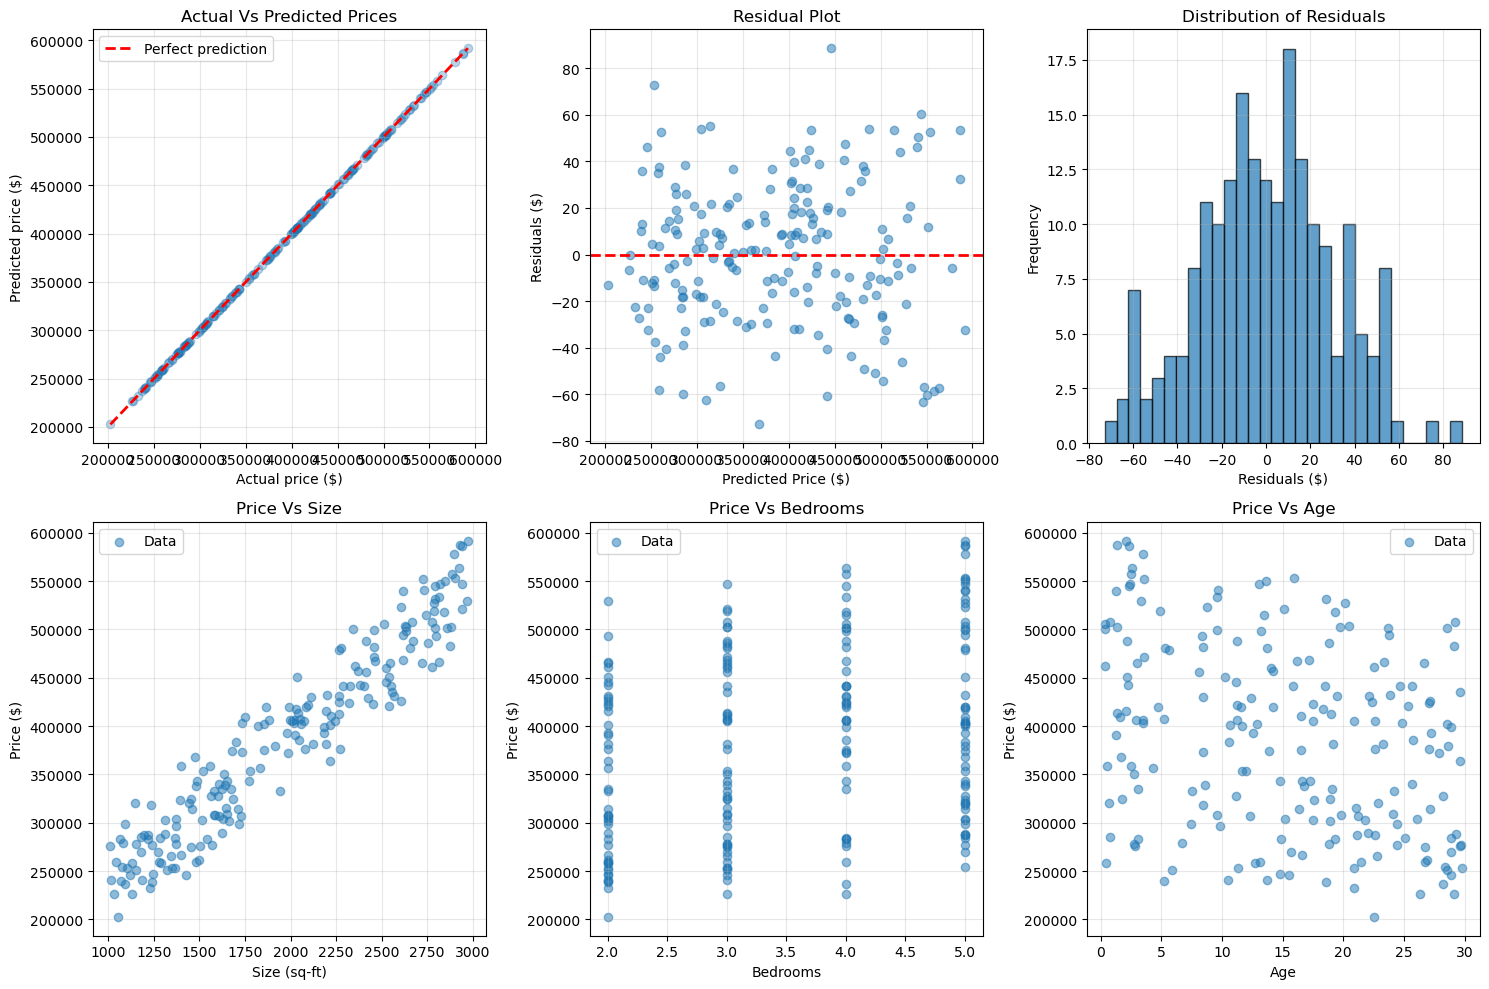

In [147]:
# Create visualizations
fig = plt.figure(figsize = (15,10))

# Plot 1. Actual Vs Predicted 
ax1 = fig.add_subplot(2, 3, 1)
y_pred  = model_scratch.predict(X_train)
ax1.scatter(y_train, y_pred, alpha = 0.3)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", lw = 2,
         label = "Perfect prediction")
ax1.set_xlabel("Actual price ($)")
ax1.set_ylabel("Predicted price ($)")
ax1.set_title("Actual Vs Predicted Prices")
ax1.legend()
ax1.grid(True, alpha = 0.3)


# Plot 2. Residuals 
ax2 = fig.add_subplot(2,3,2)
residuals = y_train - y_pred
ax2.scatter(y_pred, residuals, alpha = 0.5)
ax2.axhline(y = 0, color = "r", linestyle = "--", lw = 2)
ax2.set_xlabel("Predicted Price ($)")
ax2.set_ylabel("Residuals ($)")
ax2.set_title("Residual Plot")
ax2.grid(True, alpha = 0.3)


# Plot 3. Residual Distribution 
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(residuals, bins = 30, edgecolor = "black", alpha = 0.7)
ax3.set_xlabel("Residuals ($)")
ax3.set_ylabel("Frequency")
ax3.set_title("Distribution of Residuals")
ax3.grid(True, alpha = 0.3)


# Plot 4. Price Vs Size
ax4 = fig.add_subplot(2, 3, 4)
ax4.scatter(size, price, alpha = 0.5, label = "Data")
ax4.set_xlabel("Size (sq-ft)")
ax4.set_ylabel("Price ($)")
ax4.set_title("Price Vs Size")
ax4.legend()
ax4.grid(True, alpha = 0.3)

# Plot 5. Price Vs Bedrooms 
ax5 = fig.add_subplot(2, 3, 5)
ax5.scatter(bedrooms, price, alpha = 0.5, label = "Data")
ax5.set_xlabel("Bedrooms")
ax5.set_ylabel("Price ($)")
ax5.set_title("Price Vs Bedrooms")
ax5.legend()
ax5.grid(True, alpha = 0.3)

# Plot 6. Price Vs Age
ax6 = fig.add_subplot(2, 3, 6)
ax6.scatter(age, price, alpha = 0.5, label = "Data")
ax6.set_xlabel("Age")
ax6.set_ylabel("Price ($)")
ax6.set_title("Price Vs Age")
ax6.legend()
ax6.grid(True, alpha = 0.3)

plt.tight_layout()

In [103]:
df = pd.DataFrame(
    { "Y train": y_train,
        "Y pred": y_pred,
     "residuals" : residuals
    })
df.head()

,Y train,Y pred,residuals
0,409271.385063,409261.748882,9.636182
1,553389.299154,553336.800256,52.498898
2,467188.587962,467161.202097,27.385865
3,381334.444060,381350.895778,-16.451718
4,303213.159669,303231.383378,-18.223709


In [ ]:
"""
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
```

---

### **What You WANT to See (Good Model)**

#### Pattern 1: Random Cloud Around Zero ✓
```
Residuals
    |
 20 |   •    •     •
    |  •  •    •  •   •
  0 |--•--•--•--•--•--•--  ← Zero line
    | •   •  •   •    •
-20 |  •      •   •
    |_____________________
         Predicted Values
```

**What this means:**
- Residuals are **randomly scattered** around zero
- No clear pattern or trend
- Roughly equal spread above and below zero
- **This is IDEAL!** ✓

**Interpretation:**
- Model captures the relationship well
- Errors are just random noise
- No systematic bias

---

### **What You DON'T Want to See (Bad Model)**

#### Pattern 2: Curved Pattern (Non-linearity) ❌
```
Residuals
    |
 20 |•              •
    | •            •
  0 |--•--•----•--•-------
    |     •  •  •
-20 |      ••
    |_____________________
         Predicted Values
```

**What this means:**
- Relationship between X and y is **non-linear**
- Linear model is too simple

**Solution:**
- Add polynomial features (x², x³)
- Use non-linear models (decision trees, neural networks)
- Transform variables (log, sqrt)

---

#### Pattern 3: Funnel Shape (Heteroscedasticity) ❌
```
Residuals
    |
 50 |                  •  •
    |                •  •  •
 20 |            •  •   •
  0 |------•-•-•-----------
-20 |    •  •
    |   •
    |_____________________
         Predicted Values
```

**What this means:**
- Variance of residuals **increases** as predictions increase
- Called **heteroscedasticity** (non-constant variance)

**Why it's bad:**
- Violates linear regression assumptions
- Confidence intervals become unreliable
- Some predictions are much less certain than others

**Solution:**
- Transform the target variable (log transformation)
- Use weighted regression
- Use robust regression methods

---

#### Pattern 4: Clusters or Groups ❌
```
Residuals
    |
 20 | •••          
    | •••    
  0 |------••••----------
    |      ••••
-20 |          •••
    |          •••
    |_____________________
         Predicted Values
```

**What this means:**
- Different subgroups in your data
- Model doesn't capture group differences
- Missing important categorical variables

**Solution:**
- Add categorical features (neighborhood, house type)
- Use separate models for different groups
- Add interaction terms

---

#### Pattern 5: Systematic Bias ❌
```
Residuals
    |
 20 | • • •
    | • • • •
  0 |---------• • • •----
    |           • • •
-20 |             • • •
    |_____________________
         Predicted Values


**What this means:**

- Model consistently under-predicts for low values
- Model consistently over-predicts for high values

**Solution:**

- Add more relevant features
- Consider non-linear transformations
- Check for outliers affecting the fit

"""

In [ ]:
"""
# Histogram
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Or Q-Q plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
```

---

### **What You WANT to See (Good Model)**

#### Normal Distribution (Bell Curve) ✓
```
Frequency
    |
 40 |      ___
    |     /   \
 30 |    /     \
    |   /       \
 20 |  /         \
    | /           \
 10 |/             \
    |_________________
      Residuals
   -30  -15  0  15  30
```

**Characteristics:**
- Symmetric around zero
- Most residuals close to zero
- Few extreme residuals
- Roughly bell-shaped

**What this means:**
- Errors are **random and normally distributed**
- Linear regression assumptions are met ✓
- Statistical inference (p-values, confidence intervals) is valid

---

### **What You DON'T Want to See (Bad Model)**

#### Pattern 1: Skewed Distribution ❌

**Right-skewed:**
```
Frequency
    |___
 40 ||  \
    ||   \
 30 ||    \
    ||     \___
 20 ||         \____
    |________________
      Residuals
   -10  0  20  40  60
```

**What this means:**
- Model consistently makes larger errors in one direction
- Many small under-predictions, few large over-predictions (or vice versa)

**Solution:**
- Transform target variable (log, sqrt)
- Check for outliers
- Consider robust regression

---

#### Pattern 2: Heavy Tails (Outliers) ❌
```
Frequency
    |
 40 |  •   ___
    |  •  /   \  •
 30 |    /     \
    |  • |     | •
 20 |    |     |
    | •   \___/   •
 10 |•             •
    |_________________
      Residuals
  -100 -50  0  50 100
```

**What this means:**
- More extreme residuals than expected
- Outliers or influential points present

**Solution:**
- Investigate outliers
- Remove or handle outliers appropriately
- Use robust regression methods

---

#### Pattern 3: Bimodal Distribution ❌
```
Frequency
    |
 30 | •        •
    | •        •
 20 | •        •
    | •        •
 10 | •   •    •
    | •  • •   •
    |_________________
      Residuals
   -30 -15  0  15  30

What this means:

Two distinct groups in your data
Model treats them the same but shouldn't

Solution:

Add categorical variables
Use separate models for groups
Add interaction terms


"""